###### <center><span style="font-family:Georgia; font-size:3em;"> ***xG Model*** </span></center>

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import seaborn as sns
from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)

# extract the data
data = pd.read_excel("shots_for_xg_model.xlsx")

In [219]:
data.describe()

,period_id,min,sec,x,y
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.569080,49.366520,29.400520,84.687972,50.476090
std,0.563058,26.840778,17.377921,7.823852,12.808797
min,1.000000,0.000000,0.000000,30.600000,1.500000
25%,1.000000,27.000000,14.000000,78.200000,41.400000
50%,2.000000,50.000000,29.000000,86.400000,50.100000
75%,2.000000,72.000000,44.000000,90.900000,59.800000
max,5.000000,130.000000,59.000000,99.900000,98.500000


In [220]:
data.head()

,period_id,min,sec,x,y,volley,first_touch,head,left_footed,right_footed,1_on_1,regular_play,penalty,free_kick,set_piece,from_corner,is_goal
0,1,4,26,73.2,21.9,False,True,False,False,True,False,True,False,False,False,False,False
1,1,8,8,73.3,27.7,False,False,False,False,True,False,True,False,False,False,False,False
2,1,13,24,70.9,49.1,False,False,False,True,False,False,True,False,False,False,False,False
3,1,11,40,74.7,32.4,False,False,False,True,False,False,False,False,True,False,False,False
4,1,19,11,72.3,36.6,False,True,False,True,False,False,False,False,False,False,True,False


In [221]:
print(len(data[(data['1_on_1'] == 1)&(data['is_goal'] == 1)])/len(data[data['1_on_1'] == 1]))
len(data[(data['1_on_1'] == 1)&(data['is_goal'] == 0)])/len(data[data['1_on_1'] == 1])

0.3641207815275311


0.6358792184724689

----

###### <span style="font-family:Georgia; font-size:2em;"> ***Creation of 3 Variables*** </span>

In [222]:
## create a feature distance to goal
data['distance_to_goal'] = ((data['x'] - 100)**2 + (data['y'] - 50)**2)**0.5

## angle to goal (posts)
a2 = ((data['x'] - 100)**2 + (data['y'] - 46.35)**2)
c2 = ((data['x'] - 100)**2 + (data['y'] - 53.65)**2)
data['angle_to_goal'] = np.degrees(np.arccos((a2 + c2 - (7.3)**2)/(2*(a2**0.5)*(c2**0.5))))

## on good foot

data['on_good_foot'] = np.where((data['right_footed'] == 1) & (data['y'] <= 50), 1, 0)
data['on_good_foot'] = np.where((data['left_footed'] == 1) & (data['y'] > 50), 1, data['on_good_foot'])


data.sort_values(by = 'angle_to_goal', ascending = True).head(10)

,period_id,min,sec,x,y,volley,first_touch,head,left_footed,right_footed,1_on_1,regular_play,penalty,free_kick,set_piece,from_corner,is_goal,distance_to_goal,angle_to_goal,on_good_foot
42225,2,69,59,99.9,62.4,True,True,False,False,True,False,True,False,False,False,False,False,12.400403,0.297802,0
44570,2,90,56,99.6,30.1,False,False,False,False,True,False,True,False,False,False,False,False,19.904020,0.436990,1
6470,2,54,57,98.6,85.7,False,False,False,False,True,False,True,False,False,False,False,False,35.727440,0.463572,0
18729,2,88,25,99.4,69.4,False,False,False,True,False,False,True,False,False,False,False,False,19.409276,0.690548,1
18185,2,83,28,98.0,16.3,False,False,False,True,False,False,False,False,True,False,False,False,33.759295,0.742628,0
34803,2,76,56,99.4,32.4,False,True,False,False,True,False,False,False,False,False,False,False,17.610224,0.845483,1
24656,1,6,48,99.3,68.0,False,False,False,True,False,False,True,False,False,False,False,False,18.013606,0.940828,1
28896,2,55,15,97.8,81.4,False,False,False,False,True,False,False,False,True,False,False,False,31.476976,0.941288,0
25811,1,40,37,96.2,9.3,False,False,False,True,False,False,False,False,True,False,False,False,40.877011,0.958753,0
13405,1,12,0,99.3,32.4,False,False,False,False,True,False,True,False,False,False,False,False,17.613915,0.985939,1


---

###### <span style="font-family:Georgia; font-size:2em;"> ***Data Visualization*** </span>

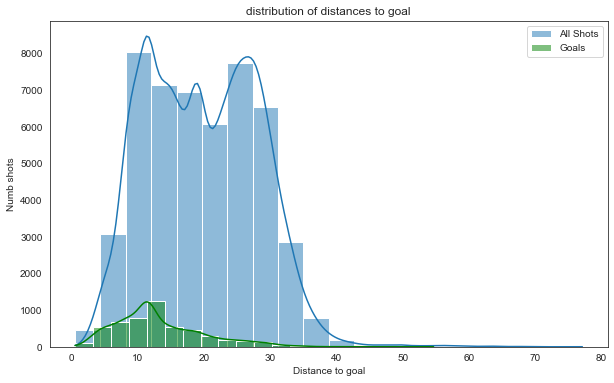

In [223]:
# Histogram of distribution of distances to goal
plt.figure(figsize=(10, 6))
sns.histplot(data['distance_to_goal'], bins=20, kde=True, label='All Shots')
sns.histplot(data[data['is_goal'] == 1]['distance_to_goal'], bins=20, kde=True, label='Goals', color='green')
plt.title('distribution of distances to goal')
plt.xlabel('Distance to goal')
plt.ylabel('Numb shots')
plt.legend()
plt.show()


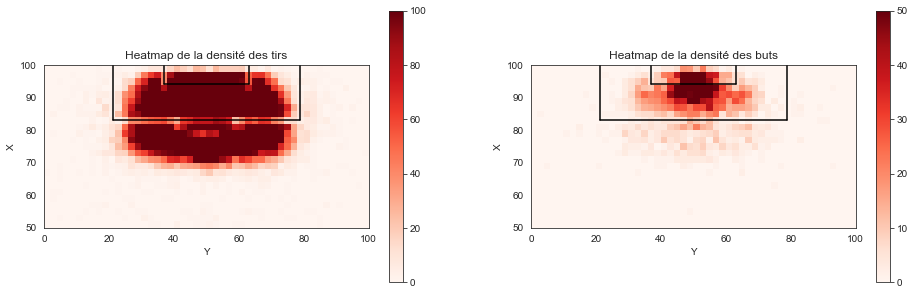

<ipython-input-224-5b23e1769d80>:44: RuntimeWarning: invalid value encountered in divide
  pos=ax.imshow(H_Goal[0]/H_Shot[0],extent=[0,100,0,100],origin='lower',cmap=plt.cm.Reds,vmin=0,vmax=0.7)


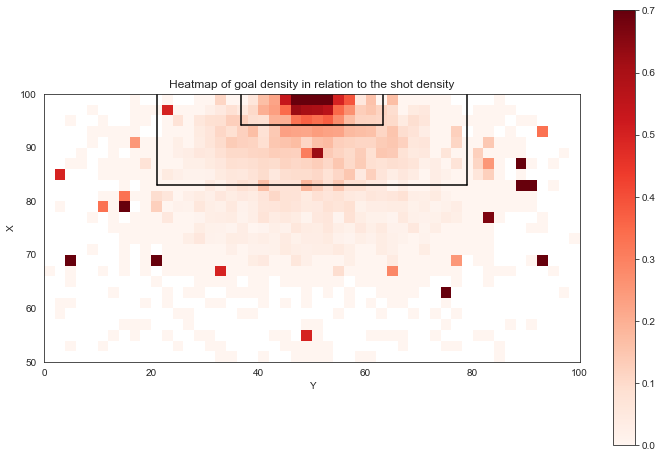

In [224]:
data2 = data #[data["set_piece"]==1]

H_Shot=np.histogram2d(data2['x'], data2['y'],bins=50,range=[[0, 100],[0, 100]])
goals_only=data2[data2['is_goal']==1]
H_Goal=np.histogram2d(goals_only['x'], goals_only['y'],bins=50,range=[[0, 100],[0, 100]])

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Heatmap of shot density
pos = axs[0].imshow(H_Shot[0], extent=[0, 100, 0, 100], origin='lower', cmap=plt.cm.Reds, vmin=0, vmax=100)
fig.colorbar(pos, ax=axs[0])
axs[0].set_title('Heatmap de la densité des tirs')
axs[0].set_xlabel('Y')
axs[0].set_ylabel('X')
axs[0].set_xlim(0, 100)
axs[0].set_ylim(50, 100)
axs[0].plot( [21.1, 21.1],[83, 100], color="black")
axs[0].plot([78.9, 78.9],[83, 100], color="black")
axs[0].plot( [21.1, 78.9], [83, 83],color="black")
axs[0].plot( [36.8, 36.8], [100, 94.2],color="black")
axs[0].plot([36.8, 63.2],[94.2, 94.2],  color="black")
axs[0].plot( [63.2, 63.2],[94.2, 100], color="black")


# Heatmap Goal density
pos = axs[1].imshow(H_Goal[0], extent=[0, 100, 0, 100], origin='lower', cmap=plt.cm.Reds, vmin=0, vmax=50)
fig.colorbar(pos, ax=axs[1])
axs[1].set_title('Heatmap de la densité des buts')
axs[1].set_xlabel('Y')
axs[1].set_ylabel('X')
axs[1].set_xlim(0, 100)
axs[1].set_ylim(50, 100)
axs[1].plot( [21.1, 21.1],[83, 100], color="black")
axs[1].plot([78.9, 78.9],[83, 100], color="black")
axs[1].plot( [21.1, 78.9], [83, 83],color="black")
axs[1].plot( [36.8, 36.8], [100, 94.2],color="black")
axs[1].plot([36.8, 63.2],[94.2, 94.2],  color="black")
axs[1].plot( [63.2, 63.2],[94.2, 100], color="black")

plt.show()

# Heatmap of goal density in relation to the shot density
fig,ax=plt.subplots(figsize=(12,8))
pos=ax.imshow(H_Goal[0]/H_Shot[0],extent=[0,100,0,100],origin='lower',cmap=plt.cm.Reds,vmin=0,vmax=0.7)
fig.colorbar(pos,ax=ax)
ax.set_title('Heatmap of goal density in relation to the shot density')
ax.set_xlabel('Y')
ax.set_ylabel('X')
ax.set_xlim(0,100)
ax.set_ylim(50,100)
ax.plot( [21.1, 21.1],[83, 100], color="black")
ax.plot([78.9, 78.9],[83, 100], color="black")
ax.plot( [21.1, 78.9], [83, 83],color="black")
ax.plot( [36.8, 36.8], [100, 94.2],color="black")
ax.plot([36.8, 63.2],[94.2, 94.2],  color="black")
ax.plot( [63.2, 63.2],[94.2, 100], color="black")
plt.show()



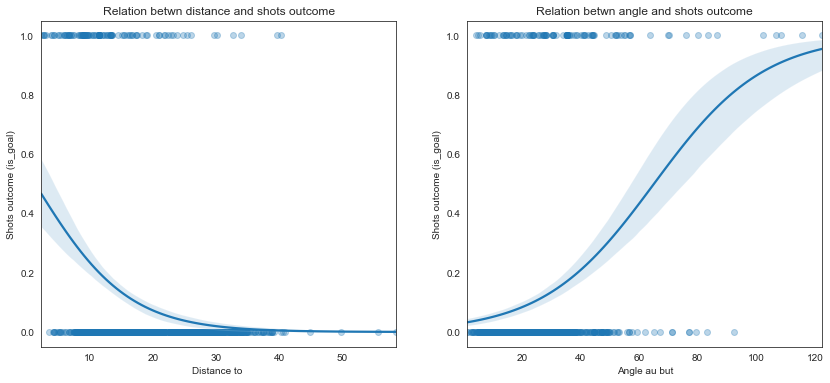

In [225]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Avg outcome of shots from different distances
sns.regplot(x='distance_to_goal', y='is_goal', data=data.head(1000), logistic=True, scatter_kws={'alpha':0.3}, ax=axs[0])
axs[0].set_title('Relation betwn distance and shots outcome')
axs[0].set_xlabel('Distance to ')
axs[0].set_ylabel('Shots outcome (is_goal)')

# Avg outcome of shots from different angles
sns.regplot(x='angle_to_goal', y='is_goal', data=data.head(1000), logistic=True, scatter_kws={'alpha':0.3}, ax=axs[1])
axs[1].set_title('Relation betwn angle and shots outcome')
axs[1].set_xlabel('Angle au but')
axs[1].set_ylabel('Shots outcome (is_goal)')

plt.show()


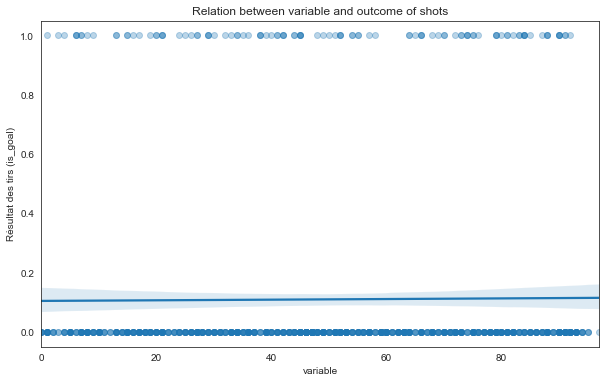

In [226]:
plt.figure(figsize=(10, 6))
sns.regplot(x='min', y='is_goal', data=data.head(1000), logistic=True, scatter_kws={'alpha':0.3})
plt.title('Relation between variable and outcome of shots')
plt.xlabel('variable')
plt.ylabel('Résultat des tirs (is_goal)')

plt.show()


In [227]:
# proportion of goals scored from left foot and right foot

print(len(data[(data['left_footed'] == 1)&(data['is_goal'] == 1)])/len(data[data['left_footed'] == 1]))

print(len(data[(data['right_footed'] == 1)&(data['is_goal'] == 1)])/len(data[data['right_footed'] == 1]))

0.09832164328657314
0.10973828603007935


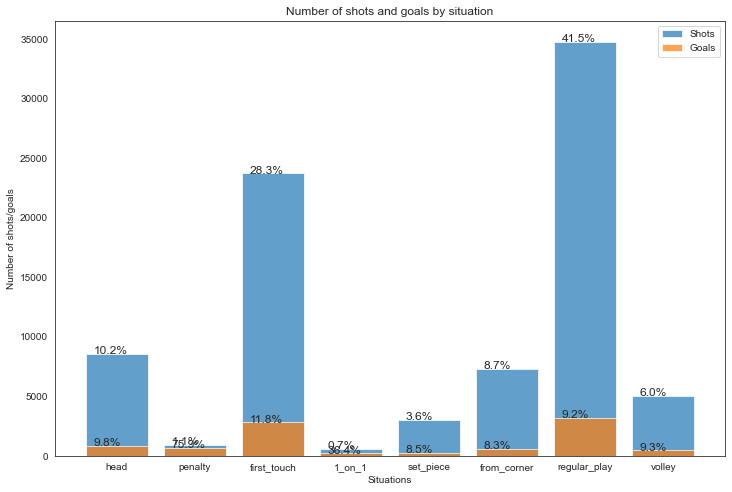

In [228]:
shot_data = data

fig, ax = plt.subplots(figsize=(12, 8))

# Shots situation
situations = ['head', 'penalty', 'first_touch', '1_on_1', 'set_piece', 'from_corner', 'regular_play', 'volley']

total_shots = []
total_goals = []

# Number shots and goals for each situation
for situation in situations:
    total_shots.append(shot_data[situation].sum())
    total_goals.append(shot_data[shot_data[situation] & (shot_data['is_goal'] == 1)].shape[0])

# array of total shots and goals
shot_percentages = np.array(total_shots) 
goal_percentages = np.array(total_goals)

positions = np.arange(len(situations))

plt.bar(positions, shot_percentages, label='Shots', alpha=0.7)
plt.bar(positions, goal_percentages, label='Goals', alpha=0.7)

# bar pourcentage
for i in range(len(positions)):
    plt.text(x=positions[i]-0.3, y=shot_percentages[i]+0.5, s=f"{np.round(shot_percentages[i]/ np.sum(total_shots) *100, 1)}%", size=12) # percentage shot per situation
    plt.text(x=positions[i]-0.3, y=goal_percentages[i]+0.5, s=f"{np.round(goal_percentages[i]/ shot_percentages[i] *100,1)}%", size=12) # percentage goal for the situation situation


plt.xlabel('Situations')
plt.ylabel('Number of shots/goals')
plt.title('Number of shots and goals by situation')
plt.xticks(positions, situations)
plt.legend()

plt.show()


/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


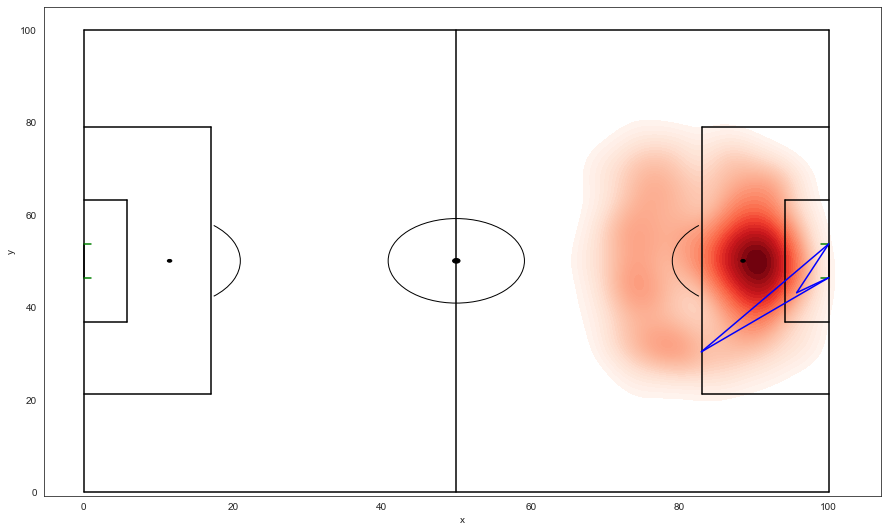

In [229]:
# Create figure
fig, ax = plt.subplots(figsize=(15, 9))

# Pitch Outline & Centre Line
plt.plot([0, 0], [0, 100], color="black")
plt.plot([0, 100], [100, 100], color="black")
plt.plot([100, 100], [100, 0], color="black")
plt.plot([100, 0], [0, 0], color="black")
plt.plot([50, 50], [0, 100], color="black")

# Left Penalty Area
plt.plot([17, 0], [21.1, 21.1], color="black")
plt.plot([17, 0], [78.9, 78.9], color="black")
plt.plot([17, 17], [21.1, 78.9], color="black")

# Right Penalty Area
plt.plot([83, 100], [21.1, 21.1], color="black")
plt.plot([83, 100], [78.9, 78.9], color="black")
plt.plot([83, 83], [21.1, 78.9], color="black")

# Left 6-yard Box
plt.plot([0, 5.8], [36.8, 36.8], color="black")
plt.plot([5.8, 5.8], [36.8, 63.2], color="black")
plt.plot([5.8, 0], [63.2, 63.2], color="black")

# Right 6-yard Box
plt.plot([100, 94.2], [36.8, 36.8], color="black")
plt.plot([94.2, 94.2], [36.8, 63.2], color="black")
plt.plot([94.2, 100], [63.2, 63.2], color="black")

# Prepare Circles
centreCircle = plt.Circle((50, 50), 9.15, color="black", fill=False)
centreSpot = plt.Circle((50, 50), 0.5, color="black")
leftPenSpot = plt.Circle((11.5, 50), 0.3, color="black")
rightPenSpot = plt.Circle((88.5, 50), 0.3, color="black")

# Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

# Prepare Arcs
leftArc = patches.Arc((11, 50), height=20, width=20, angle=0, theta1=310, theta2=50, color="black")
rightArc = patches.Arc((89, 50), height=20, width=20, angle=0, theta1=130, theta2=230, color="black")

# Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

# Draw Goal Posts and Lines
plt.plot([0, 0], [46.35, 53.65], color="black")
plt.plot([100, 100], [46.35, 53.65], color="black")
plt.plot([0, 1], [46.35, 46.35], color="green")
plt.plot([0, 1], [53.65, 53.65], color="green")
plt.plot([99, 100], [46.35, 46.35], color="green")
plt.plot([99, 100], [53.65, 53.65], color="green")

# draw the first 100 shots on the pitch of data (red if goal, blue if not) en croix pas en point

# for i in range(10):
#     if data['is_goal'][i] == 1:
#         plt.plot(data['x'][i], data['y'][i], "x", color = 'red')
#     else:
#         plt.plot(data['x'][i], data['y'][i],"x", color = 'blue')




# create a heatmap of the shots
import seaborn as sns
wpen = data
wpen = wpen.head(1000)
sns.set_style("white")
sns.kdeplot(wpen['x'], wpen['y'], shade = 'True', n_levels = 50, cmap = 'Reds')

# Trace the shots with the line to the posts

for i in range(20):
    if data['is_goal'][i] == 1:
        plt.plot([data['x'][i], 100], [data['y'][i], 46.35], color = 'blue')
        plt.plot([data['x'][i], 100], [data['y'][i], 53.65], color = 'blue')

## value average position des tirs 10 premiers tisfrom corner 

# plt.plot(data.head(z)['x'][data.head(z)['from_corner'] == 1].mean(), data.head(z)['y'][data.head(z)['from_corner'] == 1].mean(), "x", color = 'red')


plt.show()

###### <span style="font-family:Georgia; font-size:2em;"> ***Remove useless variables*** </span>

In [230]:

data = data.drop(['x',"period_id", 'y', 'min', 'sec', 'right_footed', 'left_footed'], axis=1)

---

## **MODEL** 

---

###### <span style="font-family:Georgia; font-size:2em;"> ***xG for penalties*** </span>

In [231]:
data_pen = data[data['penalty'] == 1]

# remove column de data_pen

data_pen = data_pen.drop(['head', 'penalty', 'first_touch', '1_on_1', 'set_piece', 'from_corner', 'regular_play', 'volley', "on_good_foot", "free_kick"], axis=1)


X_pen = data_pen.drop(['is_goal'], axis=1)
y_pen = data_pen['is_goal']

X_train_pen, X_test_pen, y_train_pen, y_test_pen = train_test_split(X_pen, y_pen, test_size=0.2, random_state=7)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train_pen, y_train_pen)

y_pred_pen = logreg.predict(X_test_pen)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test_pen, y_pred_pen)))

# moyenne de chance de marquer un penalty
print(len(data_pen[data_pen['is_goal'] == 1])/len(data_pen))

# attribuer une valeur à chaque tir
data_pen['xG'] = logreg.predict_proba(X_pen)[:,1]



data_pen.sort_values(by = 'xG', ascending = True)

# Afficher les coefficients pour chaque attribut
coefficients = pd.DataFrame({
    'Feature': X_train_pen.columns,
    'Coefficient': logreg.coef_[0]
})

# Trier les coefficients par valeur absolue pour voir les plus influents
coefficients['Absolute Coefficient'] = np.abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values(by='Absolute Coefficient', ascending=False)

# Afficher les coefficients
print(coefficients)

# ajouter is_goal à data_pen

data_pen.sort_values(by = 'xG', ascending = True)

data_pen['xG'].describe()


Accuracy of logistic regression classifier on test set: 0.77
0.7588105726872246
            Feature  Coefficient  Absolute Coefficient
1     angle_to_goal    -0.738799              0.738799
0  distance_to_goal     0.298977              0.298977


count    908.000000
mean       0.755438
std        0.037421
min        0.480099
25%        0.758138
50%        0.758138
75%        0.758138
max        0.889450
Name: xG, dtype: float64

----

###### <span style="font-family:Georgia; font-size:2em;"> ***xG for Non Penalty Shot*** </span>

In [232]:
# remove pen
data1 = data[data['penalty'] == 0]
data1 = data1.drop(['penalty'], axis=1)

# create label
X = data1.drop(['is_goal'], axis=1)
y = data1['is_goal']


# select the features
#X = X[['distance_to_goal', 'angle_to_goal', 'on_good_foot', '1_on_1', 'from_corner', 'right_footed', 'left_footed']]

# Split the data into training and testing sets and validation sets (70% training,  20% testing, 10% validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=7)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=7)


# size of the sets
print("Training set size: ", len(X_train), "---", round(len(X_train)/len(X)*100,1), "%")
print("Testing set size: ", len(X_test), "---", round(len(X_test)/len(X)*100,1), "%")
print("Validation set size: ", len(X_val), "---", round(len(X_val)/len(X)*100,1), "%")

Training set size:  29455 --- 60.0 %
Testing set size:  9818 --- 20.0 %
Validation set size:  9819 --- 20.0 %


In [233]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

# Prédire les probabilités d'obtenir un but (xG) pour les tirs dans l'ensemble de test
xG_predictions = model.predict_proba(X_test)[:, 1]

y_pred = model.predict(X_test)

print(xG_predictions)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, roc_curve, roc_auc_score

# Calculer les métriques de régression
mse = mean_squared_error(y_test, xG_predictions)
mae = mean_absolute_error(y_test, xG_predictions)
r2 = r2_score(y_test, xG_predictions)

# Calculer les métriques de classification (ROC et AUC)
fpr, tpr, thresholds = roc_curve(y_test, xG_predictions)
auc = roc_auc_score(y_test, xG_predictions)

# Afficher les métriques
print("Mean Squared Error (MSE): {:.4f}".format(mse))
print("Mean Absolute Error (MAE): {:.4f}".format(mae))
print("R² (R-squared): {:.4f}".format(r2))
print("AUC (Area Under the ROC Curve): {:.4f}".format(auc))

[0.06305056 0.18378788 0.01126516 ... 0.12654713 0.02767934 0.30836773]
Mean Squared Error (MSE): 0.0692
Mean Absolute Error (MAE): 0.1417
R² (R-squared): 0.1381
AUC (Area Under the ROC Curve): 0.7874


/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


             Feature  Coefficient  Absolute Coefficient
3             1_on_1     1.185623              1.185623
7        from_corner    -0.950043              0.950043
2               head    -0.921119              0.921119
6          set_piece    -0.698955              0.698955
5          free_kick     0.585825              0.585825
4       regular_play    -0.437508              0.437508
0             volley    -0.396923              0.396923
8   distance_to_goal    -0.121549              0.121549
1        first_touch    -0.092655              0.092655
10      on_good_foot     0.066274              0.066274
9      angle_to_goal     0.019265              0.019265


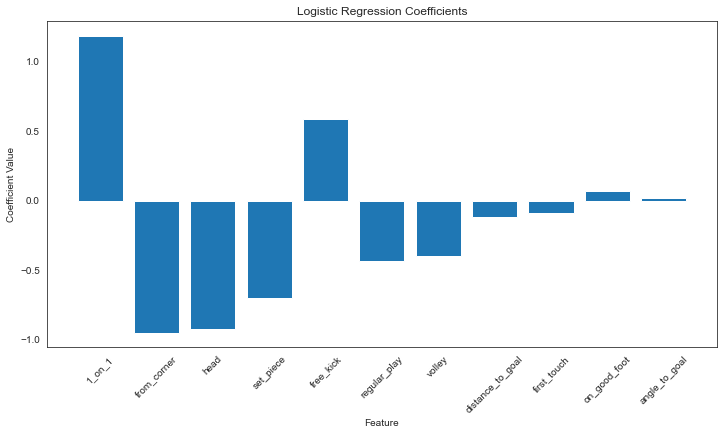

In [234]:
# Extrct the coefficients
coefficients = model.coef_[0]
feature_names = X_train.columns

# DAtaFrame of coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})


coefficients_df['Absolute Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

print(coefficients_df)

# plot the coefficients
plt.figure(figsize=(12, 6))
plt.bar(coefficients_df['Feature'], coefficients_df['Coefficient'])
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')
plt.xticks(rotation=45)
plt.show()


In [235]:

# Predict the xG for the shots
xG_predictions = model.predict_proba(data1.drop(['is_goal'], axis=1))[:, 1]

# Add
data1['xG'] = xG_predictions

data1.sort_values(by = 'xG', ascending = False)


,volley,first_touch,head,1_on_1,regular_play,free_kick,set_piece,from_corner,is_goal,distance_to_goal,angle_to_goal,on_good_foot,xG
38561,False,False,False,True,True,False,False,False,True,1.835756,130.434237,1,0.955452
18290,False,True,False,False,True,False,False,False,True,0.806226,155.257840,1,0.916116
27536,False,False,False,True,False,False,False,False,False,3.764306,88.152917,0,0.915898
7534,False,True,False,False,False,False,False,True,True,0.500000,167.408557,0,0.889261
12876,False,True,False,False,False,False,True,False,True,1.431782,158.766053,0,0.886406
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29353,False,False,False,False,True,False,False,False,False,70.313726,5.421213,1,0.000143
15955,False,False,False,False,True,False,False,False,False,70.684935,4.606561,1,0.000135
39812,True,False,False,False,True,False,False,False,False,69.426004,6.016753,1,0.000108
39443,False,False,False,False,True,False,False,False,False,75.266061,4.968146,1,0.000078


###### <span style="font-family:Georgia; font-size:2em;"> ***Optimization of the HyperParameters:*** </span>

In [236]:
from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres à optimiser
param_grid = {
    'penalty': ['l2'],
    'C': [100],
    'max_iter': [300],
    'solver': ['lbfgs']
}

model = LogisticRegression()

# GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=5)

grid_search.fit(X_train, y_train)

print("BEst paramètres:", grid_search.best_params_)

# Use the best model
best_model = grid_search.best_estimator_
xG_predictions = best_model.predict_proba(X_test)[:, 1]

mse = mean_squared_error(y_test, xG_predictions)
mae = mean_absolute_error(y_test, xG_predictions)
r2 = r2_score(y_test, xG_predictions)

fpr, tpr, thresholds = roc_curve(y_test, xG_predictions)
auc = roc_auc_score(y_test, xG_predictions)

# Print metrics
print("Mean Squared Error (MSE): {:.4f}".format(mse))
print("Mean Absolute Error (MAE): {:.4f}".format(mae))
print("R² (R-squared): {:.4f}".format(r2))
print("AUC (Area Under the ROC Curve): {:.4f}".format(auc))


BEst paramètres: {'C': 100, 'max_iter': 300, 'penalty': 'l2', 'solver': 'lbfgs'}
Mean Squared Error (MSE): 0.0692
Mean Absolute Error (MAE): 0.1417
R² (R-squared): 0.1381
AUC (Area Under the ROC Curve): 0.7876


###### <span style="font-family:Georgia; font-size:2em;"> ***Cross Validation*** </span>

In [237]:
from sklearn.model_selection import cross_val_score

# best hyperparameters
model = LogisticRegression(C = 100, penalty = 'l2', solver = 'liblinear', max_iter = 100)

# Cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')

print("Score :", cv_scores)

# Mean cross-validation score
print("Mean Score Cross Val", cv_scores.mean())


Score : [0.79017617 0.78601828 0.77626515 0.7708844  0.7590185 ]
Mean Score Cross Val 0.7764724995347064


____

###### <span style="font-family:Georgia; font-size:2em;"> ***Model Comparison (MLP)*** </span>

In [238]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, roc_curve, roc_auc_score

mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, activation='relu', solver='adam', random_state=7)
mlp_model.fit(X_train, y_train)

xG_predictions = mlp_model.predict_proba(X_test)[:, 1]

mse2 = mean_squared_error(y_test, xG_predictions)
mae2 = mean_absolute_error(y_test, xG_predictions)
r22 = r2_score(y_test, xG_predictions)

fpr2, tpr2, thresholds = roc_curve(y_test, xG_predictions)
auc2 = roc_auc_score(y_test, xG_predictions)

# Afficher les métriques
print("Mean Squared Error (MSE): {:.4f}".format(mse2))
print("Mean Absolute Error (MAE): {:.4f}".format(mae2))
print("R² (R-squared): {:.4f}".format(r22))
print("AUC (Area Under the ROC Curve): {:.4f}".format(auc2))


Mean Squared Error (MSE): 0.0690
Mean Absolute Error (MAE): 0.1354
R² (R-squared): 0.1401
AUC (Area Under the ROC Curve): 0.7895


In [239]:
# comparison models

results_df = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'R²', 'AUC'])

results_df = results_df.append({'Model': 'Logistic Regression',
                                'MSE': mse,     
                                'MAE': mae,
                                'R²': r2,
                                'AUC': auc}, ignore_index=True)

results_df = results_df.append({'Model': 'MLP',
                                'MSE': mse2,                             
                                'MAE': mae2,
                                'R²': r22,
                                'AUC': auc2}, ignore_index=True)

results_df


,Model,MSE,MAE,R²,AUC
0,Logistic Regression,0.069172,0.141670,0.138125,0.787629
1,MLP,0.069016,0.135365,0.140062,0.789518


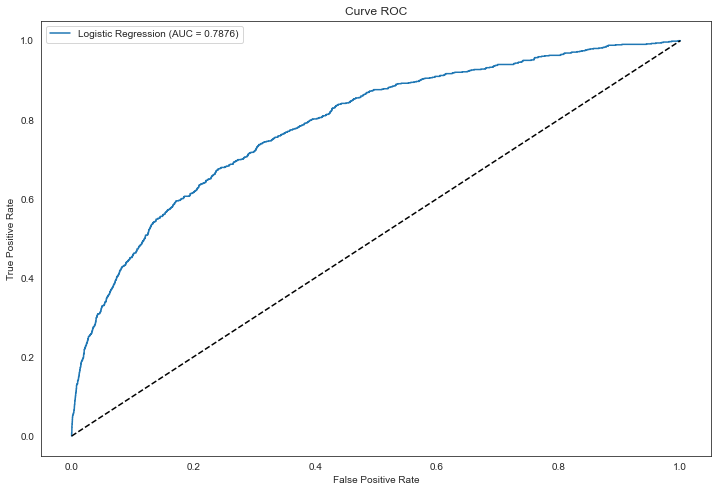

In [240]:
## Roc curve

fig, ax = plt.subplots(figsize=(12, 8))

plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.4f})'.format(auc))
# function y = x
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.title('Curve ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [241]:
## CLASS DISCRIMINATION
from sklearn.metrics import accuracy_score, classification_report

threshold = 0.5

accuracy = accuracy_score(y_test, (xG_predictions >= threshold).astype(int))
print("Précision du modèle : {:.2f}".format(accuracy))

# Afficher un rapport de classification
report = classification_report(y_test, (xG_predictions >= 0.5).astype(int))
print(report)

Précision du modèle : 0.92
              precision    recall  f1-score   support

       False       0.92      0.99      0.96      8954
        True       0.66      0.12      0.20       864

    accuracy                           0.92      9818
   macro avg       0.79      0.56      0.58      9818
weighted avg       0.90      0.92      0.89      9818



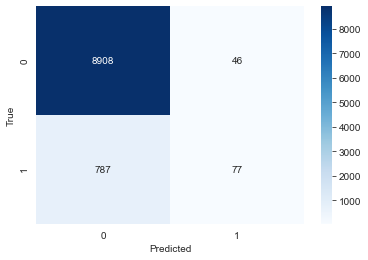

In [242]:
#confusion matrix 
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

# heatmap
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### <center><span style="font-family:Georgia; font-size:2em;"> ***FINAL SCORE:*** </span><center>

In [243]:
# final score model on validation set

model = LogisticRegression(C = 100, penalty = 'l2', solver = 'lbfgs', max_iter = 300)
model.fit(X_train, y_train)

# Prédire les probabilités d'obtenir un but (xG) pour les tirs dans l'ensemble de test
xG_predictions = model.predict_proba(X_val)[:, 1]

# Calculer les métriques de régression
mse = mean_squared_error(y_val, xG_predictions)
mae = mean_absolute_error(y_val, xG_predictions)
r2 = r2_score(y_val, xG_predictions)

# Calculer les métriques de classification (ROC et AUC)
fpr, tpr, thresholds = roc_curve(y_val, xG_predictions)
auc = roc_auc_score(y_val, xG_predictions)


print("Mean Squared Error (MSE): {:.4f}".format(mse))
print("Mean Absolute Error (MAE): {:.4f}".format(mae))
print("R² (R-squared): {:.4f}".format(r2))
print("AUC (Area Under the ROC Curve): {:.4f}".format(auc))

## CLASS DISCRIMINATION
from sklearn.metrics import accuracy_score, classification_report

threshold = 0.5

accuracy = accuracy_score(y_val, (xG_predictions >= threshold).astype(int))
print("Précision du modèle : {:.2f}".format(accuracy))

# Afficher un rapport de classification
report = classification_report(y_val, (xG_predictions >= threshold).astype(int))
print(report)

Mean Squared Error (MSE): 0.0725
Mean Absolute Error (MAE): 0.1463
R² (R-squared): 0.1323
AUC (Area Under the ROC Curve): 0.7865
Précision du modèle : 0.91
              precision    recall  f1-score   support

       False       0.91      0.99      0.95      8916
        True       0.56      0.09      0.15       903

    accuracy                           0.91      9819
   macro avg       0.74      0.54      0.55      9819
weighted avg       0.88      0.91      0.88      9819



## Comparison with dummy model

In [244]:
from sklearn.dummy import DummyClassifier

# DummyClassifier 'most_frequent' will predict the most frequent class in the training set so it will always predict 0
dummy_model = DummyClassifier(strategy='most_frequent', random_state=7)

dummy_model.fit(X_train, y_train)

dummy_predictions = dummy_model.predict_proba(X_val)[:, 1]

mse_dummy = mean_squared_error(y_val, dummy_predictions)
mae_dummy = mean_absolute_error(y_val, dummy_predictions)
r2_dummy = r2_score(y_val, dummy_predictions)

fpr_dummy, tpr_dummy, thresholds_dummy = roc_curve(y_val, dummy_predictions)
auc_dummy = roc_auc_score(y_val, dummy_predictions)

print("Mean Squared Error (MSE) Dummy: {:.4f}".format(mse_dummy))
print("Mean Absolute Error (MAE) Dummy: {:.4f}".format(mae_dummy))
print("R² (R-squared) Dummy: {:.4f}".format(r2_dummy))
print("AUC (Area Under the ROC Curve) Dummy: {:.4f}".format(auc_dummy))

accuracy_dummy = accuracy_score(y_val, dummy_model.predict(X_val))
print("Précision du Dummy Classifier : {:.2f}".format(accuracy_dummy))

report_dummy = classification_report(y_val, dummy_model.predict(X_val))
print(report_dummy)


Mean Squared Error (MSE) Dummy: 0.0920
Mean Absolute Error (MAE) Dummy: 0.0920
R² (R-squared) Dummy: -0.1013
AUC (Area Under the ROC Curve) Dummy: 0.5000
Précision du Dummy Classifier : 0.91
              precision    recall  f1-score   support

       False       0.91      1.00      0.95      8916
        True       0.00      0.00      0.00       903

    accuracy                           0.91      9819
   macro avg       0.45      0.50      0.48      9819
weighted avg       0.82      0.91      0.86      9819



/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [217]:
# proportion of goals scored y_val
print(len(y_val[y_val == 1])/len(y_val))

0.09196455850901314


#### <span style="font-family:Georgia; font-size:2em;"> ***Improve the model*** </span>

##### ADD DATA/Var #####
- ***Add the position of defenders in the trajectory of the shot***
- ***Add the position of partners***
- ***Add the position of the goalkeeper***
- ***Add maybe the difficulty of the shot (scale 1-5)***

https://statsbomb.com/news/statsbomb-release-expected-goals-with-shot-impact-height/